## Automatic Differentiation (AD) Documentation

### Introduction to Automatic Differentiation (AD)

Derivatives and their application in the form of differential equations is ubiquitous in each and every branch of engineering and especially in machine learning. Machine learning is all about optimization of certain models we propose and finding the "best available" estimator given a certain objective function and defined domain or input. These tasks can very often be restated to finding the extrema of the objective functions or the zeros of the derivative of the objective function.

*Automatic differentiation (AD)*, also called *algorithmic differentiation* or simply *“autodiff”*, is a family of techniques similar to, but more general than, backpropagation for efficiently and accurately evaluating derivatives of numeric functions expressed as computer programs.<sup>[1]</sup> AD exploits the idea that every computer program, no matter how complicated, simply executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions ($\exp$, $\log$, $\sin$, $\cos$, etc.) <sup>[2]</sup>. By applying the chain rule repeatedly to these operations derivatives, can be computed automatically: 
 - to an arbitrary high order of derivate,
 - accurately to working precision, and 
 - using at most a small constant factor more arithmetic operations than the original computer program.  


### Why AD and not Symbolic Differentiation or Numerical Differentiation?

These three key characteristics of AD (i.e., possibility to calculate high order derivatives, obtain machine precision, and achieve low computational cost) are some very important advantages AD poses over other methods of differentiation like *symbolic differentiation* and *numerical differentiation*:
 - **Symbolic differentiation:** can be defined as a “method of computing” or “calculus” of derivatives by giving symbolic rules for finding formulas for derivatives when we are given formulas for the functions<sup>[2]</sup>. At first, you might think AD is the same as symbolic differentiation; symbolic differentiation manipulates mathematical expressions as done in Mapple, Matlab or Mathematica, yet AD operates on computer programs. Symbolic differentiation is hard to implement efficiently and faces the difficulty of converting a computer program into a single expression.
 
 - **Numerical differentiation:** Suppose we want to avoid relying on the symbolic computation of the derivative, an obvious and very convenient way to do so is to use a finite difference. <sup>[3]</sup> For a single-variable function, we write for some "small" $\epsilon$: 
 
 $$\dfrac{\partial f}{\partial x} \approx \dfrac{f\left(x+\epsilon\right) - f\left(x\right)}{\epsilon}$$  
 
 We don't know the preferred value for $\epsilon$, yet intuition (correction, naive intuition) would suggest, the smaller our choice of $\epsilon$ is, the closer we get to the exact derivate. $$\dfrac{\partial f}{\partial x} = \lim_{\epsilon \rightarrow 0} \dfrac{f\left(x+\epsilon\right) - f\left(x\right)}{\epsilon}$$ 
 
Now let's consider an adapted example from the Lecture 9.<sup>[3]</sup> What happens for different values of $\epsilon$ when we use finite differences for estimation of the derivative of $f(x)=e^x$ (where in this case $f(x)=e^x=f^{\prime}_{exact}$):


The minimum error: 2.3650104348541789e-05
The minimum was obtained at epsilon = 5.1607487103859185e-09.
Machine precision is 2.2204460492503131e-16
Ratio (Minimum error / Machine precision): 1.0651060113136615e+11


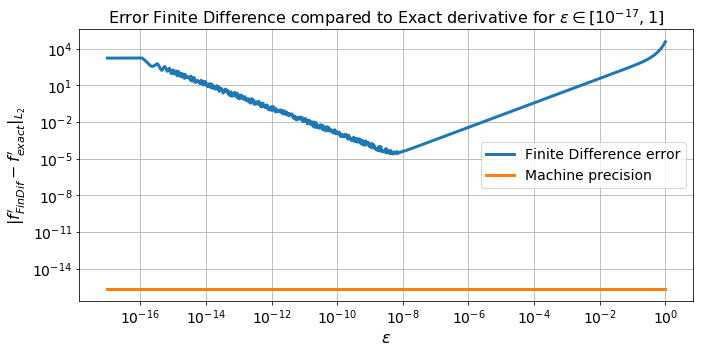

In [2]:
# Load libraries that we'll need
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    # Hard-coded f(x)
    return np.exp(x**2)
    
def dfdx(x):
    # Hard-coded Jacobian of f(x)
    return 2*x*np.exp(x**2)

def dfdx_h(x, epsilon):
    # Finite difference
    return (f(x + epsilon) - f(x)) / epsilon

x = np.linspace(-2, 2, 1000) # Define domain
eps = np.logspace(-17, 0, 1000) # Define \epsilon domain

err = np.zeros(len(eps))
# Loop over epsilons
for idx, e in enumerate(eps):
    df_err = dfdx_h(x,e) - dfdx(x) # Compute error between FD and analytical at each point
    err[idx] = np.linalg.norm(df_err) # Store error as L2 norm

# Make a log-log plot of the error
fig, ax = plt.subplots(1,1, figsize=(11,5))
ax.plot(eps, err, lw=3, label='Finite Difference error')
ax.plot(eps, np.ones(eps.shape)*np.finfo(float).eps,lw=3, label='Machine precision' )
fontsize=18
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\epsilon$', fontsize=16)
ax.set_ylabel(r'$\| f^{\prime}_{FinDif} - f^{\prime}_{exact}\|_{L_{2}}$', fontsize=16)
ax.tick_params(labelsize=14)
ax.grid()
ax.legend(fontsize=14)
ax.set_title(r'Error Finite Difference compared to Exact derivative for $\epsilon \in [10^{-17},1]$', fontsize=16)

# Print out minimum error
print(r"The minimum error: {:17.16e}".format(err.min()))
print(r"The minimum was obtained at epsilon = {:17.16e}.".format(eps[err==err.min()][0]))
print(r"Machine precision is {:17.16e}".format(np.finfo(float).eps))
print(r"Ratio (Minimum error / Machine precision): {:17.16e}".format(err.min()/np.finfo(float).eps))

We observe that the smallest difference between finite difference estimations and the exact derivative that obtain is $10^{-5}$. This is $100,000,000,000$ greater than our machine precision error! When $\epsilon$ decreases to values below $\sqrt{\epsilon_{\text{machine}}}=\sqrt{10^{-16}}=10^{-8}$ the amplification from floating point errors will clutter our finite difference error since both numerator and denominator are becoming increasingly small.

 - **Summary: Why use AD and not symbolic differentiation or numerical differentiation?**
   - **Symbolic differentiation** for higher order derivatives can be very laborious when done manually. If using a computer, we cannot always ensure a small computational cost.
   - **Numerical differentiation** or finite differences introduces round-off errors, and thus, not make certain that a derivative calculation is precise to machine precision, suffering from accuracy and stability problems <sup>[3]</sup>.

#### References 
* [A Hitchhiker’s Guide to Automatic Differentiation](https://link.springer.com/article/10.1007/s11075-015-0067-6)
* Griewank, A. and Walther, A., 2008. Evaluating derivatives: principles and techniques of algorithmic differentiation (Vol. 105). Siam.
* <a name="myfootnote1">1</a>: Baydin, Atilim Gunes; Pearlmutter, Barak; Radul, Alexey Andreyevich; Siskind, Jeffrey (2018). "Automatic differentiation in machine learning: a survey". Journal of Machine Learning Research. 18: 1–43.
* <a name="myfootnote2">2</a>: From Wikipedia, the free encyclopedia; [Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation#cite_note-baydin2018automatic-2)
* <a name="myfootnote3">3</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 9 of October 2nd, 2018.
* <a name="myfootnote4">4</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 10 of October 4nd, 2018.
* <a name="myfootnote5">5</a>: [Chapter 6 Symbolic Differentiation](http://homepage.divms.uiowa.edu/~stroyan/CTLC3rdEd/3rdCTLCText/Chapters/ch6.pdf)

### Brief mathematical background

The essential mathematical ideas behind AD are 1. *The Chain Rule*, 2. *Computational Graphs of Elementary Functions*, and 3. *Forward mode Automatic Differentiation*, and 4. Dual Numbers.


**1. The Foundation of AD: The Chain Rule**: 
 
 The foundation for Automatic Differentiation constitutes the chain rule, which computes the derivative of the composition of two or more functions. If $f$ and $g$ are functions, then the chain rule expresses the derivative of their composition $F=f \circ  g$ ($f$ applied to the output of $g(x)$, AKA $f$ after $g$, that maps $x$ to $F(x)=f(g(x))$) in terms of the derivatives of $f$ and $g$ and the product of function as follows: <sup>[6]</sup>
 $$ F^{'}=(f\circ g)^{'}=(f'\circ g)\cdot g^{'}$$
 $$ F^{'}(x)=f'(g(x))g^{'}(x)$$

  - **The univariate function $f(g(x))$:** given the function $f(g(x))$ with $x\in\mathbb{R}$ and we want the derivative of $f$ with respect to $x$, the chain rule states <sup>[3]</sup> 
:
$$\dfrac{\partial f}{\partial x} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial x}$$  
  - **The multi-variate functino $f(g(x),h(x))$:** when the function has multiple arguments (e.g. $g(x), h(x)$) the chain rule states <sup>[3]</sup>
:  
$$\dfrac{\partial f}{\partial x} = \dfrac{\partial f}{\partial g}\dfrac{\partial g}{\partial x}+ \dfrac{\partial f}{\partial h}\dfrac{\partial h}{\partial x}$$ 
  - **General rule:** we can generalize the case by introducing the notion of gradient and replacing the scalar $x$ by a vector $x\in\mathbb{R}^m$. Now $f$ is a function of possibly $n$ other functions, which themselves may be a function of $m$ variables. The gradient of $f$ is now given by: <sup>[3]</sup> 
$$\nabla_{x}f = \sum_{i=1}^{n}{\frac{\partial f}{\partial y_{i}}\nabla y_{i}\left(x\right)}$$

 What this general rule implies is that, for any multivariate function composed of sub-function, the derivative or gradient is the sum of the product of the partial derivatives and its gradients of the sub-functions. If a program can compute any given sub-function as well as the partial derivative of any sub-functions, the calculation of the derivative can be reduced to a sum and products.
 
 
**2. Computational Graphs of Elementary Functions**
  
 Circling back to our introduction: AD exploits the idea that every computer program, no matter how complicated, just execute a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary function (exp, log, sin, cos, etc.). Since we know the partial derivatives of all these elementary operations and elementary functions, we can use the general rule for any function composed of sub-functions to calculate the exact derivative or gradient.
 
 *The reduction of a complex model to elementary operations* is formalised by the concept of *computational graphs*. The basic idea in a computational graph is to express some model as a directed graph expressing a sequence of computational steps. Each step in the sequence corresponds to a vertex in the computational graph; each step corresponds to a elementary operation that takes some inputs and produces some output as a function of its inputs. <sup>[7]</sup> Once the graph has been defined using underlying primitive operations, AD calculates derivatives automatically based on “local” derivatives of these operations and puts everything together by using the general rule.
 
 Consider again the example function: $$f(x) = \exp(x^2)=\exp( ( x^2 )) $$ The computational graph looks like:
 ![comp-graph](figs/graph.png)
 
 
**3. Forward mode AD**
  
 So now that we have reduced our complex function to a forward direct graph of elementary functions and operations, we can execute **Forward mode AD**: We start at the input variable $x$ and at each evaluation step, we also evaluate the derivative with the chain rule. Therefore, if our function $f(x)$ is composed of elementary functions for which we know the partial derivatives, it is a simple task to compute the derivative, as we show here in the example of evaluating the derivative at $x=3$ of: $$f(x) = \exp(x^2)=\exp( ( x^2 )) $$



 | Trace    | Elementary Operation &nbsp;&nbsp;&nbsp;| Derivative &nbsp;&nbsp;&nbsp; | $\left(f\left(a\right),  f^{\prime}\left(a\right)\right)$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :------: | :----------------------:               | :------------------------------: | :------------------------------: |
| $x_{1}$  | $3$                      | $1$                | $\left(3, 1\right)$ |
| $x_{2}$  | $x_{1}^2$                               | $2x_1\times {x}_{1}$                 | $\left(x_{1}^2=3^2=9, \\  2x_1\times {x}_{1}=2\times 3\times 1\right)\\=(9,6)$ |
| $x_{3}$  | $\exp\left(x_{2}\right)$               | $\exp\left(x_{2}\right)\times {x}_{2}$           | $\left(\exp\left(x_{2}\right)=e^9, \\ \exp\left(x_{2}\right)\times {x}_{2}=e^9\times 6\right)\\=(e^9, 6\times e^9)$ |

  There are two modes of AD: reverse and forward mode. 
 - *Forward mode* performs differentiation, starting our evaluation on the graph at the independent input variable.
 - *Reverse mode* calculates differentation, starting at the dependent output variable. 
 This project will implement both forwards and reverse mode AD.
 
 
**4. Dual numbers**

A last concept to introduce are dual numbers. A dual number has a real part and a dual part.  We write $$z = x + \epsilon x^{\prime}$$ and refer to $x^{\prime}$ as the dual part.  We *define* the number $\epsilon$ so that $\epsilon^{2} = 0$. <sup>[4]</sup> 

Let's now evaluate the evaluate a function $f$ using a dual number $x$ as the input, rewriting the expression as a Taylor expansion, and using the property of nilpotency of epsilon: $\epsilon^2 =0 $ and $\epsilon^3=\epsilon^2\times \epsilon=0 $:

\begin{align*}
  f(x + a) &=  f(x) + f^{\prime}(x)a + f^{\prime\prime}(x)\dfrac{a^2}{2!}+ f^{\prime\prime\prime}(x)\dfrac{a^3}{3!} +...  \\
  f(x + x^{\prime}\epsilon) &=  f(x) + f^{\prime}(x)x^{\prime}\epsilon + f^{\prime\prime}(x) \dfrac{x^{\prime2}\epsilon^2}{2!} + f^{\prime\prime\prime}(x) \dfrac{x^{\prime3}\epsilon^3}{3!}...  \\ 
  f(x + x^{\prime}\epsilon) &=  f(x) + f^{\prime}(x)x^{\prime}\epsilon  \\
\end{align*}

We will use dual numbers indirectly in our implementation of AD since evaluating our function f on a dual number returns a value $f(x + x^{\prime}\epsilon)$ constituting of:
1. a real part: the function evaluated at the real part of x
2. a dual part: the derivative function evaluated at the real part of x

As we look back at our table above, we observe that our last column is exactly this tuple $(f(x),f^{\prime}(x))$. 

#### References  
* <a name="myfootnote3">3</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 9 of October 2nd, 2018.
* <a name="myfootnote4">4</a>: Davic Sondak, Harvard Course CS207: Systems Development for Computational Science (Fall 2018). Lecture 10 of October 4nd, 2018.
* <a name="myfootnote1">6</a>: From Wikipedia, the free encyclopedia; [The Chain Rule](https://en.wikipedia.org/wiki/Chain_rule)
* <a name="myfootnote1">7</a>: Computational Graphs, and Backpropagation ([Course Notes](http://www.cs.columbia.edu/~mcollins/ff2.pdf) for NLP by Michael Collins, Columbia University) 

### Software Organization

#### Directory structure:
* home_directory
  - AD 
    - Parser, Lexer, Interpreter, Calculator: `interpreter.py`
    - User Interface: `autodif.py`
  - Tests
    - `test_AD.py`
        - Tests operations conducted by the package: addition, subtraction, multiplication, division, exponents, logarithms, and trigonometric functions (sin and cos in radians) 
  - Documentation
    - Automatic Differentiation (AD) package documentation
    - How to install and use
    - How to package
  
#### Basic modules  

* `interpreter.py` contains the parser, lexer, and interpreter which is used to handle user inputs. Using the interpreted function, it computes the result and derivative at a user provided point. 
* `autodif.py` provides a user-friendly interface for the underlying interpreter classes. The interface creates an AD object that takes in a formula passed in by the user. This formula is passed to the lexer, parser, and interpreter classes of `interpreter.py`. Various function calls can then be used on the AD object such as set_point() to set the point of evaluation / differentiation, diff() to take the derivative with respect to a passed in variable, and diff_all() which returns the derivative of each variable. 

#### Testing

The test suite resides in the `tests` subdirectory and runs with `pytest`. It uses `TravisCI` and `Coveralls` for continuous integration. 

#### Installation

The package is distributed through `PyPI` and can be found at: https://pypi.org/project/AD-testing-packaging-CS207/

To install, complete the following steps:
* Pip install the package from PyPI
    - `pip install AD-testing-packaging-CS207`
* Run the Python interpreter
    - `python`
* Import the `AD` package
    - `import AD.autodif as autodif`

#### Demo

In [2]:
import AD.autodif as autodif
F1 = autodif.AD("x*y*z")
vd = "x:2,y:3,z:4"
print("Derivative of x: {}".format(F1.diff("x", vd)))
print("Derivative of all variables: {}".format(F1.diff_all(vd)))

F1.new_formula("a+b")
vd = "a:10, b : 20"
F1.set_point(vd)
print("Value: {}".format(F1.val()))
print("Derivative of all variables: {}".format(F1.diff_all()))
print("Derivative of a: {}".format(F1.diff("a")))

Import Succesful!
Derivative of x: 12
Derivative of all variables: {'d_x': 12, 'd_y': 8, 'd_z': 6}
Value: 30
Derivative of all variables: {'d_a': 1, 'd_b': 1}
Derivative of a: 1


### Implementation

* **What are the core data structures?**

  - The core data structure is the Abstract Syntax Tree. The AST allows us to represent a formula as a combination of the types listed below under "High Level Overview of Formulas". For instance, "3-b" can be thought of as "MINUS(INTEGER(3),VARIABLE(b))" Where MINUS is the root node and INTEGER(3) and VARIABLE(b) are its leaves. This allows us to easily add new functions to trees and recursively traverse the formula according to the order of operations where the leaf nodes are processed first.
  
* **What classes will you implement?**

  - In order to create the AST, we based our code on the aforementioned interpreter. This required 3 classes: the parser, lexer, and interpreter. The parser breaks up a user's input into tokens. The lexer takes the tokens and applies mathematical logic in order to generate an AST. The interpreter takes an AST and is able to evaluate it (be it a straight evaluation given a point or a derivative given a point and variable to differentiate). Within each of these broad categories, other helper classes are used for instance a Token class used to represent tokens, sub-AST classes that for the different types of formula units (as listed below under "High Level Overview of Formulas"), and a NodeVisitor to traverse the AST.
  - At the user level, we need to implement a wrapper class, AD, for the three classes in our AST so that it is more user friendly. 
  
* **What method and name attributes will your classes have?**

  - The AD class in autodif.py will allow users to create an AD object which takes a well formed formula. The user can then provide a point through set_point() where the function will be evaluated. Methods of evaluation include val() which gets the value, diff() which gets the derivative with respect to the passed in variable, and diff_all() which will get the derivative for each variable.
  
* **What external dependencies will you rely on?**

  - As mentioned above, we will be using "https://ruslanspivak.com/lsbasi-part7/" as the basis for our parser code and evaluation code. We will also be using Math and Numpy to evaluate formulas and derivatives.
  
* **How will you deal with elementary functions like `sin` and `exp`?**

  - Basic trigonometric functions are implemented as unary operators in our abstract syntax tree. Their evaluation will be coded in using Numpy and or Math. Their derivatives will be coded with special rules just like all other operations.
  - Powers can be computed as the binary operator pow(x, y). We will need to encode certain constants such as e and pi as protected names (ie. you can't have a variable called 'e' or 'pi').
  
### High Level Overview of Formulas
* Abstract Syntax Tree Grammar
  - Value
    - VARIABLE (alphabetic names only
    - INTEGER (can also be a python accepted float)
  - BinOp
    - ADD
    - MINUS
    - MUL
    - DIV
    - POW
  - UnOp
    - SIN
    - COS
    - LOG
  - LPAREN, RPAREN
  
### Future Implementation
* Properly implement str() / repr() at the AST level
* Allowing constants like pi and e
* Improving method of parsing floats
* Allowing carrot notation for power
* Reverse differentiation